## Multivariate timeseries analysis

Again we work with 2NE1 dataset. As by nature our dataset is univariate, we I need to first build the following dataset and extract features like mean, std, difference between the current value with 1, 2 and 3 previous days.

                                         Features                                                          target
-----------------------------------------------------------------------------------------------------     -------              
vat(t=-3)   vat(t=-2)   vat(t=-1)  mean  std   vat(t)-vat(t=-3)   vat(t)-vat(t=-2)   vat(t)-vat(t=-1)      vat(t)

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers.recurrent import LSTM
# from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [3]:
df = pd.read_csv('DF_2NE1.CSV')
df['date_idx'] = pd.to_datetime(df['date_idx'], infer_datetime_format=True)

In [4]:
df.head()

,2NE1_zh.wikipedia.org_all-access_spider,date_idx
0,18,2015-07-01
1,11,2015-07-02
2,5,2015-07-03
3,13,2015-07-04
4,14,2015-07-05


In [5]:
window_size = 3
data = []
target = []
for i in range(len(df) - window_size - 1):
    data.append(df[i:i + window_size]['2NE1_zh.wikipedia.org_all-access_spider'])
    target.append(df.loc[i+window_size]['2NE1_zh.wikipedia.org_all-access_spider'] ) 

In [6]:
data[:5]

[0    18
 1    11
 2     5
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 1    11
 2     5
 3    13
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 2     5
 3    13
 4    14
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 3    13
 4    14
 5     9
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 4    14
 5     9
 6     9
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64]

In [7]:
np.array(data)

array([[18, 11,  5],
       [11,  5, 13],
       [ 5, 13, 14],
       ...,
       [26, 14, 20],
       [14, 20, 22],
       [20, 22, 19]], dtype=int64)

In [8]:
target[:5]

[13, 14, 9, 9, 22]

In [9]:
type(data)

list

In [10]:
len(data)

546

In [11]:
len(target)

546

In [12]:
[item for item in zip(data, target)]

[(0    18
  1    11
  2     5
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  13),
 (1    11
  2     5
  3    13
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  14),
 (2     5
  3    13
  4    14
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  9),
 (3    13
  4    14
  5     9
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  9),
 (4    14
  5     9
  6     9
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  22),
 (5     9
  6     9
  7    22
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  26),
 (6     9
  7    22
  8    26
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  24),
 (7    22
  8    26
  9    24
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  19),
 (8     26
  9     24
  10    19
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  10),
 (9     24
  10    19
  11    10
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  1

In [13]:
dict1 = {'features': data,
        'target': target}
# TypeError: unhashable type: 'list'

In [14]:
dict1

{'features': [0    18
  1    11
  2     5
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  1    11
  2     5
  3    13
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  2     5
  3    13
  4    14
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  3    13
  4    14
  5     9
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  4    14
  5     9
  6     9
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  5     9
  6     9
  7    22
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  6     9
  7    22
  8    26
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  7    22
  8    26
  9    24
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  8     26
  9     24
  10    19
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  9     24
  10    19
  11    10
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  10    19
  11    10
  12    14
  Name: 2NE1_zh.wik

In [15]:
pd.DataFrame(dict1)

,features,target
0,0 18 1 11 2 5 Name: 2NE1_zh.wikipedi...,13
1,1 11 2 5 3 13 Name: 2NE1_zh.wikipedi...,14
2,2 5 3 13 4 14 Name: 2NE1_zh.wikipedi...,9
3,3 13 4 14 5 9 Name: 2NE1_zh.wikipedi...,9
4,4 14 5 9 6 9 Name: 2NE1_zh.wikipedi...,22
...,...,...
541,541 63 542 15 543 26 Name: 2NE1_zh.wi...,14
542,542 15 543 26 544 14 Name: 2NE1_zh.wi...,20
543,543 26 544 14 545 20 Name: 2NE1_zh.wi...,22
544,544 14 545 20 546 22 Name: 2NE1_zh.wi...,19


In [16]:
def create_dataset(dataset, col_name = '2NE1_zh.wikipedia.org_all-access_spider', window_size = 3):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size): 
        a = dataset[i:(i + window_size)][col_name]
        data_X.append(a)
        data_Y.append(dataset.loc[i + window_size][col_name])
    return(np.array(data_X), np.array(data_Y))

In [17]:
features, target_val = create_dataset(df)

In [18]:
features

array([[18, 11,  5],
       [11,  5, 13],
       [ 5, 13, 14],
       ...,
       [14, 20, 22],
       [20, 22, 19],
       [22, 19, 18]], dtype=int64)

In [19]:
tuple_list = list(zip(features, target_val))

In [20]:
len(tuple_list)

547

In [21]:
tuple_list[0]

(array([18, 11,  5], dtype=int64), 13)

In [22]:
tuple_list[0][0][0]

18

In [23]:
tuple_list[:]

[(array([18, 11,  5], dtype=int64), 13),
 (array([11,  5, 13], dtype=int64), 14),
 (array([ 5, 13, 14], dtype=int64), 9),
 (array([13, 14,  9], dtype=int64), 9),
 (array([14,  9,  9], dtype=int64), 22),
 (array([ 9,  9, 22], dtype=int64), 26),
 (array([ 9, 22, 26], dtype=int64), 24),
 (array([22, 26, 24], dtype=int64), 19),
 (array([26, 24, 19], dtype=int64), 10),
 (array([24, 19, 10], dtype=int64), 14),
 (array([19, 10, 14], dtype=int64), 15),
 (array([10, 14, 15], dtype=int64), 8),
 (array([14, 15,  8], dtype=int64), 16),
 (array([15,  8, 16], dtype=int64), 8),
 (array([ 8, 16,  8], dtype=int64), 8),
 (array([16,  8,  8], dtype=int64), 16),
 (array([ 8,  8, 16], dtype=int64), 7),
 (array([ 8, 16,  7], dtype=int64), 11),
 (array([16,  7, 11], dtype=int64), 10),
 (array([ 7, 11, 10], dtype=int64), 20),
 (array([11, 10, 20], dtype=int64), 18),
 (array([10, 20, 18], dtype=int64), 15),
 (array([20, 18, 15], dtype=int64), 14),
 (array([18, 15, 14], dtype=int64), 49),
 (array([15, 14, 49], 

In [24]:
pd.DataFrame(tuple_list, columns=['features1', 'target'])

,features1,target
0,"[18, 11, 5]",13
1,"[11, 5, 13]",14
2,"[5, 13, 14]",9
3,"[13, 14, 9]",9
4,"[14, 9, 9]",22
...,...,...
542,"[15, 26, 14]",20
543,"[26, 14, 20]",22
544,"[14, 20, 22]",19
545,"[20, 22, 19]",18


In [25]:
feature_1 = []
feature_2 = []
feature_3 = []
for i in range(len(tuple_list)):
    feature_1 .append(tuple_list[i][0][0])
    feature_2 .append(tuple_list[i][0][1])
    feature_3 .append(tuple_list[i][0][2])
#     for j in range(3):
#         tuple_list[i][0][j]

In [26]:
feature_3

[5,
 13,
 14,
 9,
 9,
 22,
 26,
 24,
 19,
 10,
 14,
 15,
 8,
 16,
 8,
 8,
 16,
 7,
 11,
 10,
 20,
 18,
 15,
 14,
 49,
 10,
 16,
 18,
 8,
 5,
 9,
 7,
 13,
 9,
 7,
 4,
 11,
 10,
 5,
 9,
 9,
 9,
 9,
 13,
 4,
 15,
 25,
 9,
 5,
 6,
 20,
 3,
 14,
 46,
 5,
 5,
 13,
 4,
 9,
 10,
 9,
 11,
 11,
 11,
 9,
 15,
 5,
 10,
 7,
 4,
 8,
 9,
 10,
 6,
 13,
 16,
 6,
 24,
 9,
 11,
 12,
 8,
 14,
 6,
 6,
 11,
 14,
 6,
 10,
 20,
 7,
 15,
 8,
 15,
 5,
 8,
 8,
 5,
 11,
 165,
 34,
 6,
 13,
 8,
 9,
 11,
 26,
 18,
 3,
 5,
 12,
 6,
 16,
 19,
 9,
 10,
 11,
 11,
 7,
 9,
 10,
 24,
 6,
 6,
 8,
 16,
 13,
 10,
 10,
 6,
 5,
 20,
 6,
 47,
 9,
 9,
 12,
 11,
 17,
 15,
 14,
 11,
 97,
 11,
 12,
 11,
 14,
 15,
 12,
 104,
 5,
 22,
 45,
 75,
 29,
 34,
 20,
 12,
 25,
 9,
 62,
 20,
 19,
 8,
 23,
 13,
 16,
 34,
 36,
 11,
 18,
 12,
 24,
 30,
 27,
 44,
 35,
 53,
 11,
 26,
 13,
 18,
 9,
 16,
 6,
 19,
 20,
 19,
 22,
 30,
 14,
 16,
 22,
 15,
 15,
 26,
 16,
 13,
 27,
 18,
 13,
 32,
 31,
 16,
 38,
 18,
 9,
 14,
 10,
 24,
 8,
 15,
 18,
 10,


In [27]:
df_tmp = list(zip(feature_1, feature_2, feature_3, target_val))

In [28]:
df_tmp[:5]

[(18, 11, 5, 13),
 (11, 5, 13, 14),
 (5, 13, 14, 9),
 (13, 14, 9, 9),
 (14, 9, 9, 22)]

In [29]:
df_base = pd.DataFrame(df_tmp, columns=['var_lag3', 'var_lag2', 'var_lag1', 'current_val'])

In [30]:
df_base.head()

,var_lag3,var_lag2,var_lag1,current_val
0,18,11,5,13
1,11,5,13,14
2,5,13,14,9
3,13,14,9,9
4,14,9,9,22


In [31]:
df['date_idx'][3:]

3     2015-07-04
4     2015-07-05
5     2015-07-06
6     2015-07-07
7     2015-07-08
         ...    
545   2016-12-27
546   2016-12-28
547   2016-12-29
548   2016-12-30
549   2016-12-31
Name: date_idx, Length: 547, dtype: datetime64[ns]

In [32]:
df_base.tail()

,var_lag3,var_lag2,var_lag1,current_val
542,15,26,14,20
543,26,14,20,22
544,14,20,22,19
545,20,22,19,18
546,22,19,18,20


In [33]:
date_series = df['date_idx'][3:]
pd.concat([df_base, date_series], axis=1)

,var_lag3,var_lag2,var_lag1,current_val,date_idx
0,18.0,11.0,5.0,13.0,NaT
1,11.0,5.0,13.0,14.0,NaT
2,5.0,13.0,14.0,9.0,NaT
3,13.0,14.0,9.0,9.0,2015-07-04
4,14.0,9.0,9.0,22.0,2015-07-05
...,...,...,...,...,...
545,20.0,22.0,19.0,18.0,2016-12-27
546,22.0,19.0,18.0,20.0,2016-12-28
547,NaN,NaN,NaN,NaN,2016-12-29
548,NaN,NaN,NaN,NaN,2016-12-30


In [34]:
len(df_base)

547

In [35]:
len(df['date_idx'][3:])

547

In [36]:
df['date_idx'][3:]

3     2015-07-04
4     2015-07-05
5     2015-07-06
6     2015-07-07
7     2015-07-08
         ...    
545   2016-12-27
546   2016-12-28
547   2016-12-29
548   2016-12-30
549   2016-12-31
Name: date_idx, Length: 547, dtype: datetime64[ns]

### As you see the date is not concatinated properly even with "ignore_index=True". This issue is explain [here](https://stackoverflow.com/questions/32801806/pandas-concat-ignore-index-doesnt-work). By reseting indices of both dataframes, this can be resolved as follows:

In [37]:
date_series.reset_index(drop=True, inplace=True)

In [38]:
df_base.reset_index(drop=True, inplace=True)

In [39]:
df_base_features = pd.concat([df_base, date_series], axis=1)
df_base_features

,var_lag3,var_lag2,var_lag1,current_val,date_idx
0,18,11,5,13,2015-07-04
1,11,5,13,14,2015-07-05
2,5,13,14,9,2015-07-06
3,13,14,9,9,2015-07-07
4,14,9,9,22,2015-07-08
...,...,...,...,...,...
542,15,26,14,20,2016-12-27
543,26,14,20,22,2016-12-28
544,14,20,22,19,2016-12-29
545,20,22,19,18,2016-12-30


In [40]:
columns_to_keep = ['var_lag1', 'var_lag2', 'var_lag3']
df_base_features[columns_to_keep].mean(axis=1)

0      11.333333
1       9.666667
2      10.666667
3      12.000000
4      10.666667
         ...    
542    18.333333
543    20.000000
544    18.666667
545    20.333333
546    19.666667
Length: 547, dtype: float64

In [41]:
columns_to_keep = ['var_lag1', 'var_lag2', 'var_lag3']
df_base_features['mean'] = df_base_features[columns_to_keep].mean(axis=1).apply(lambda x: round(x, 2))

In [42]:
df_base_features.head()

,var_lag3,var_lag2,var_lag1,current_val,date_idx,mean
0,18,11,5,13,2015-07-04,11.33
1,11,5,13,14,2015-07-05,9.67
2,5,13,14,9,2015-07-06,10.67
3,13,14,9,9,2015-07-07,12.00
4,14,9,9,22,2015-07-08,10.67


In [43]:
columns_to_keep = ['var_lag1', 'var_lag2', 'var_lag3']
df_base_features['std'] = df_base_features[columns_to_keep].std(axis=1).apply(lambda x: round(x, 2))

In [44]:
df_base_features['diff1'] = df_base_features['current_val'] - df_base_features['var_lag1']
df_base_features['diff2'] = df_base_features['current_val'] - df_base_features['var_lag2']
df_base_features['diff3'] = df_base_features['current_val'] - df_base_features['var_lag3']

In [45]:
df_base_features

,var_lag3,var_lag2,var_lag1,current_val,date_idx,mean,std,diff1,diff2,diff3
0,18,11,5,13,2015-07-04,11.33,6.51,8,2,-5
1,11,5,13,14,2015-07-05,9.67,4.16,1,9,3
2,5,13,14,9,2015-07-06,10.67,4.93,-5,-4,4
3,13,14,9,9,2015-07-07,12.00,2.65,0,-5,-4
4,14,9,9,22,2015-07-08,10.67,2.89,13,13,8
...,...,...,...,...,...,...,...,...,...,...
542,15,26,14,20,2016-12-27,18.33,6.66,6,-6,5
543,26,14,20,22,2016-12-28,20.00,6.00,2,8,-4
544,14,20,22,19,2016-12-29,18.67,4.16,-3,-1,5
545,20,22,19,18,2016-12-30,20.33,1.53,-1,-4,-2


### Applying XGBoost to above dataframe

Now that we have created features and prepared our dataframe, we use different models to predict values. As the number of data is only 547 records, lightgbm and catboost are probably not suitable.

In [46]:
# ! conda install -c anaconda py-xgboost

# Specifications: - py-xgboost -> python[version='>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.5,<3.6.0a0']

In [47]:
from xgboost import XGBRegressor

In [48]:
df_base_features.dtypes

var_lag3                int64
var_lag2                int64
var_lag1                int64
current_val             int64
date_idx       datetime64[ns]
mean                  float64
std                   float64
diff1                   int64
diff2                   int64
diff3                   int64
dtype: object

In [49]:
df_base_features.isnull().any()

var_lag3       False
var_lag2       False
var_lag1       False
current_val    False
date_idx       False
mean           False
std            False
diff1          False
diff2          False
diff3          False
dtype: bool

In [50]:
X = df_base_features.drop('current_val', axis = 1)
X = X.drop('date_idx', axis = 1)
y = df_base_features['current_val']

In [51]:
X.isnull().any()

var_lag3    False
var_lag2    False
var_lag1    False
mean        False
std         False
diff1       False
diff2       False
diff3       False
dtype: bool

In [52]:
y.isnull().any()

False

In [53]:
seed = 2021
test_size = 0.1
train_len = round(len(df_base_features) * (1-test_size))
X_train = X[:train_len]
X_test = X[train_len:]
y_train = y[:train_len]
y_test = y[train_len:]
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state = seed)
# # preparing validation set
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5)

# # fit model on training data
xgb_model = XGBRegressor(random_state=seed, n_estimators=2000, max_depth=4, colsample_bytree=0.85, missing=None,
                         scale_pos_weight=0.1, learning_rate=0.008, reg_alpha=2.01, reg_lambda=0.05, verbosity=1)
xgb_model.fit(X_train, y_train, verbose=150 )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.85, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.008, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=2000, n_jobs=8, num_parallel_tree=1,
             random_state=2021, reg_alpha=2.01, reg_lambda=0.05,
             scale_pos_weight=0.1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=1)

In [54]:
predictions_xgb = xgb_model.predict(X_test)
predictions_xgb

array([ 63.37521 ,  12.908805,  50.88125 ,  11.950102,  19.544756,
        13.738129,   8.444078,  15.292019,  14.045978,  12.74824 ,
         5.706309,  11.991892,  10.426684,  43.940742,  22.775871,
        23.685684,  14.610772,  10.765169, 253.27005 ,  13.651187,
        54.065205,  25.695747,  25.73571 ,  15.390067,  13.693675,
        47.669296,  14.189787,  13.761846,  18.205252,  19.316801,
        12.83852 ,  15.052923,  14.481504,  20.554176,  59.55235 ,
        20.370491,  14.518354,  15.712749,  18.503553,  17.410868,
        21.03111 ,  18.800829,  52.73854 ,  58.75331 ,  14.27705 ,
        27.686716,  57.4965  ,  14.114   ,  23.331219,  14.216544,
        20.799997,  21.33165 ,  18.886366,  17.40021 ,  19.257027],
      dtype=float32)

In [57]:
xgb_model.score(X_test, y_test)

0.9350600529668849

In [58]:
xgb_model.score(X_train, y_train)

0.9997910522430393

In [60]:
# from sklearn.metrics import accuracy_score

In [61]:
# accuracy_score(y_test, predictions_xgb)

# accuracy_score is for classification problem and not regressor. If you try it, not only it is wrong, but also
# you will get the following error:
# ValueError: Classification metrics can't handle a mix of multiclass and continuous targets


In [62]:
xgb_model.feature_importances_

array([0.01269336, 0.01669864, 0.13238259, 0.0202602 , 0.00843673,
       0.12595655, 0.5119872 , 0.17158477], dtype=float32)

In [66]:
imp = pd.DataFrame({'importance': xgb_model.feature_importances_*100, 'feature': X.columns})

In [67]:
imp

,importance,feature
0,1.269336,var_lag3
1,1.669864,var_lag2
2,13.238258,var_lag1
3,2.026020,mean
4,0.843673,std
5,12.595655,diff1
6,51.198723,diff2
7,17.158478,diff3


In [68]:
def train_xgb(test_size, seed = 2021):
    seed = seed
    test_size = test_size
    train_len = round(len(df_base_features) * (1-test_size))
    X_train = X[:train_len]
    X_test = X[train_len:]
    y_train = y[:train_len]
    y_test = y[train_len:]
    # X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state = seed)
    # # preparing validation set
    # X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5)

    # # fit model on training data
    xgb = XGBRegressor(random_state=seed, n_estimators=2000, max_depth=4, colsample_bytree=0.85, missing=None,
                             scale_pos_weight=0.1, learning_rate=0.008, reg_alpha=2.01, reg_lambda=0.05, verbosity=1)
    xgb.fit(X_train, y_train, verbose=150 )
    return xgb

In [89]:
xgb_1 = train_xgb(test_size=0.1)

In [84]:
xgb_2 = train_xgb(test_size=0.15)

In [85]:
xgb_3 = train_xgb(test_size=0.2)

In [86]:
xgb_4 = train_xgb(test_size=0.25)

In [87]:
xgb_5 = train_xgb(test_size=0.3)

In [95]:
xgb_model_list = []
xgb_model_list.append(xgb_1)
xgb_model_list.append(xgb_2)
xgb_model_list.append(xgb_3)
xgb_model_list.append(xgb_4)
xgb_model_list.append(xgb_5)

In [90]:
xgb_1.score(X_test, y_test)

0.9350600529668849

In [91]:
xgb_1.score(X_train, y_train)

0.9997910522430393

In [92]:
xgb_2.score(X_test, y_test)

0.9344761731132468

In [93]:
xgb_2.score(X_train, y_train)

0.999746762941462

In [96]:
importance = []
for model in xgb_model_list:
    imp = pd.DataFrame({'importance': model.feature_importances_*100, 'feature': X.columns})
    importance.append(imp)

In [97]:
importance

[   importance   feature
 0    1.269336  var_lag3
 1    1.669864  var_lag2
 2   13.238258  var_lag1
 3    2.026020      mean
 4    0.843673       std
 5   12.595655     diff1
 6   51.198723     diff2
 7   17.158478     diff3,
    importance   feature
 0    1.295685  var_lag3
 1    1.804179  var_lag2
 2   12.535397  var_lag1
 3    1.913498      mean
 4    0.802537       std
 5   13.024042     diff1
 6   52.178478     diff2
 7   16.446186     diff3,
    importance   feature
 0    1.248971  var_lag3
 1    1.587720  var_lag2
 2   13.039702  var_lag1
 3    1.862373      mean
 4    0.819530       std
 5   13.115053     diff1
 6   52.550484     diff2
 7   15.776171     diff3,
    importance   feature
 0    1.382007  var_lag3
 1    1.596977  var_lag2
 2   13.140847  var_lag1
 3    1.963362      mean
 4    0.770369       std
 5   10.746139     diff1
 6   54.650085     diff2
 7   15.750216     diff3,
    importance   feature
 0    1.108533  var_lag3
 1    1.454450  var_lag2
 2   12.913348  var_l

In [99]:
type(importance[0])

pandas.core.frame.DataFrame

In [104]:
imp_df = pd.merge(importance[0], importance[1], left_on='feature', 
                  right_on='feature')[['feature', 'importance_x', 'importance_y']]
for i in range(2, len(importance)):
    imp_df = pd.merge(imp_df, importance[i], left_on='feature', right_on='feature')

imp_df

,feature,importance_x,importance_y,importance_x,importance_y,importance
0,var_lag3,1.269336,1.295685,1.248971,1.382007,1.108533
1,var_lag2,1.669864,1.804179,1.587720,1.596977,1.454450
2,var_lag1,13.238258,12.535397,13.039702,13.140847,12.913348
3,mean,2.026020,1.913498,1.862373,1.963362,1.857154
4,std,0.843673,0.802537,0.819530,0.770369,0.733038
5,diff1,12.595655,13.024042,13.115053,10.746139,9.768962
6,diff2,51.198723,52.178478,52.550484,54.650085,57.427700
7,diff3,17.158478,16.446186,15.776171,15.750216,14.736814


In [105]:
imp_df['mean'] = imp_df.mean(axis=1)

In [106]:
imp_df

,feature,importance_x,importance_y,importance_x,importance_y,importance,mean
0,var_lag3,1.269336,1.295685,1.248971,1.382007,1.108533,1.260906
1,var_lag2,1.669864,1.804179,1.587720,1.596977,1.454450,1.622638
2,var_lag1,13.238258,12.535397,13.039702,13.140847,12.913348,12.973511
3,mean,2.026020,1.913498,1.862373,1.963362,1.857154,1.924482
4,std,0.843673,0.802537,0.819530,0.770369,0.733038,0.793829
5,diff1,12.595655,13.024042,13.115053,10.746139,9.768962,11.849970
6,diff2,51.198723,52.178478,52.550484,54.650085,57.427700,53.601093
7,diff3,17.158478,16.446186,15.776171,15.750216,14.736814,15.973574


In [107]:
import seaborn as sns

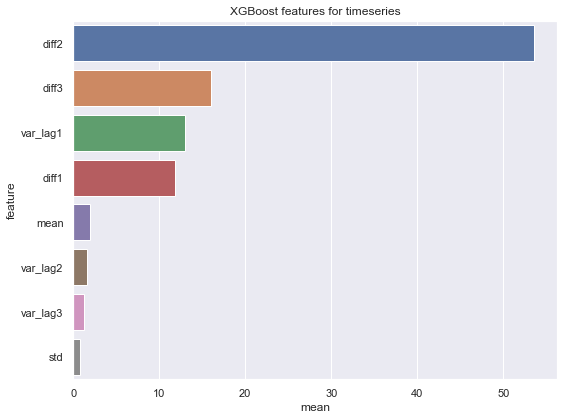

In [109]:
plt.figure(figsize=(8,6))
sns.set(context='notebook',style='darkgrid',palette='deep',font='sans-serif',font_scale=1)
sns.barplot(x='mean', y='feature', data=imp_df.sort_values(by='mean', ascending=False))
plt.title('XGBoost features for timeseries')
plt.tight_layout()
plt.show()

In [110]:
import lightgbm

In [111]:
lgb = lightgbm.LGBMRegressor(random_state=2020, n_estimators=2000, num_leaves=20, learning_rate=0.011, colsample_bytree=0.85, max_depth=5,
                              verbose=-1, importance='gain')
lgb.fit(X_train, y_train, verbose=False)
pred = lgb.predict(X_test, num_iteration=lgb.best_iteration_)
# print(f1_score(y_test, pred, pos_label=0))

[LightGBM] [Warning] Unknown parameter: importance


In [112]:
lgb.score(X_test, y_test)

0.5265484540196874

In [113]:
lgb.score(X_train, y_train)

0.775950157163151

In [114]:
def train_lgb(test_size, seed = 2021):
    seed = seed
    test_size = test_size
    train_len = round(len(df_base_features) * (1-test_size))
    X_train = X[:train_len]
    X_test = X[train_len:]
    y_train = y[:train_len]
    y_test = y[train_len:]
    # X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state = seed)
    # # preparing validation set
    # X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5)

    # # fit model on training data
    lgb = lightgbm.LGBMRegressor(random_state=2020, n_estimators=2000, num_leaves=20, learning_rate=0.011, colsample_bytree=0.85, max_depth=5,
                              verbose=-1)
    lgb.fit(X_train, y_train, verbose=150 )
    return lgb

In [115]:
lgb_1 = train_lgb(test_size=0.1)

In [116]:
lgb_2 = train_lgb(test_size=0.15)

In [117]:
lgb_3 = train_lgb(test_size=0.2)

In [118]:
lgb_4 = train_lgb(test_size=0.25)

In [119]:
lgb_5 = train_lgb(test_size=0.3)

In [120]:
lgb_model_list = []
lgb_model_list.append(lgb_1)
lgb_model_list.append(lgb_2)
lgb_model_list.append(lgb_3)
lgb_model_list.append(lgb_4)
lgb_model_list.append(lgb_5)

In [122]:
lgb_5.score(X_test, y_test)

0.09745579311032204

In [121]:
lgb_5.score(X_train, y_train)

0.696006355464206

In [123]:
importance = []
for model in lgb_model_list:
    imp = pd.DataFrame({'importance': model.feature_importances_*100, 'feature': X.columns})
    importance.append(imp)

In [126]:
imp_df = pd.merge(importance[0], importance[1], left_on='feature', 
                  right_on='feature')[['feature', 'importance_x', 'importance_y']]
for i in range(2, len(importance)):
    imp_df = pd.merge(imp_df, importance[i], left_on='feature', right_on='feature')


In [127]:
imp_df['mean'] = imp_df.mean(axis=1)
imp_df

,feature,importance_x,importance_y,importance_x,importance_y,importance,mean
0,var_lag3,146200,158400,169600,136100,154500,152960.0
1,var_lag2,109100,114400,125400,119000,141400,121860.0
2,var_lag1,135200,142300,161300,156100,223500,163680.0
3,mean,234400,237700,238200,202000,164700,215400.0
4,std,125500,160400,160400,328500,231300,201220.0
5,diff1,273400,239900,232400,229700,201600,235400.0
6,diff2,285200,323200,306400,176500,205700,259400.0
7,diff3,188300,169400,172800,213400,230100,194800.0


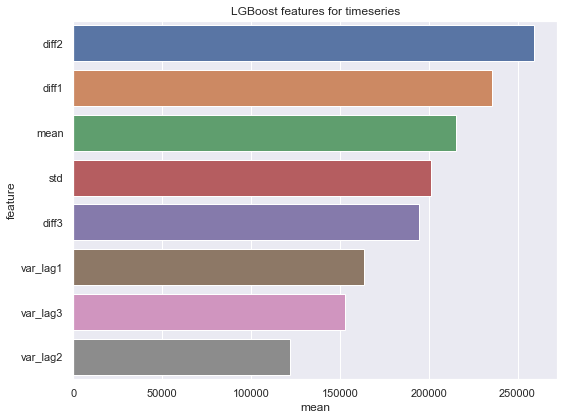

In [128]:
plt.figure(figsize=(8,6))
sns.set(context='notebook',style='darkgrid',palette='deep',font='sans-serif',font_scale=1)
sns.barplot(x='mean', y='feature', data=imp_df.sort_values(by='mean', ascending=False))
plt.title('LGBoost features for timeseries')
plt.tight_layout()
plt.show()